<a href="https://colab.research.google.com/github/MartinPdeS/PackLab/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build latest package version
============================


In [1]:
!python -m pip install PackLab --no-cache-dir --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.7 MB/s eta 0:00:00


imports
-------

In [2]:
from PackLab import Domain, Options, Simulator, UniformRadiusSampler

Simulation domain
-----------------
The domain defines the physical volume of the simulation.
Here we use periodic boundary conditions on a cubic box.

In [3]:
domain = Domain(
    length_x=6.0,
    length_y=6.0,
    length_z=6.0,
    use_periodic_boundaries=True
)

Radius sampler
--------------
All spheres will have radius 0.2 in this example.

In [4]:
radius_sampler = UniformRadiusSampler(
    minimum_radius=0.15,
    maximum_radius=0.15
)


Simulation options
------------------
These control the stochastic behaviour of the RSA algorithm.

In [6]:
options = Options()
options.random_seed = 123
options.maximum_attempts = 2_500_000
options.maximum_consecutive_rejections = 50_000
options.target_packing_fraction = 0.50
options.minimum_center_separation_addition = 0.0

Run the simulator
-----------------
Construct the simulator and run the RSA process.


In [7]:
rsa_simulator = Simulator(
    domain=domain,
    radius_sampler=radius_sampler,
    options=options
)

result = rsa_simulator.run()

Print statistics
----------------
The statistics object reports attempts, accepted insertions,
packing fraction and other useful diagnostic information.



In [14]:
result.statistics.print() # for some reason, the c++ std::cout doesn't show on google Colab notebooks

Plot a 2D slice of the configuration
------------------------------------
This provides a visual view of the spatial arrangement of spheres.

/usr/local/lib/python3.12/dist-packages/MPSPlots/helper.py:77: UserWarning: Glyph 8776 (\N{ALMOST EQUAL TO}) missing from font(s) cmr10.
  figure.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8776 (\N{ALMOST EQUAL TO}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


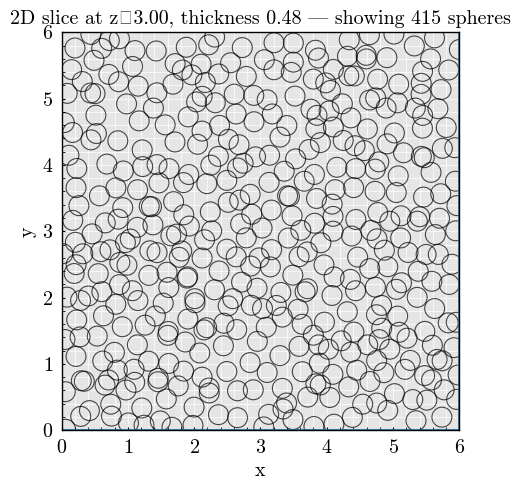

In [9]:
_ = result.plot_slice_2d(
    slice_axis="z",
    slice_center_fraction=0.5,
    slice_thickness_fraction=0.08,
    maximum_circles_in_slice=2500,
)

Pair correlation function
-------------------------
We finally compute and plot the pair correlation function g(r)
using Monte Carlo sampling of particle pairs.

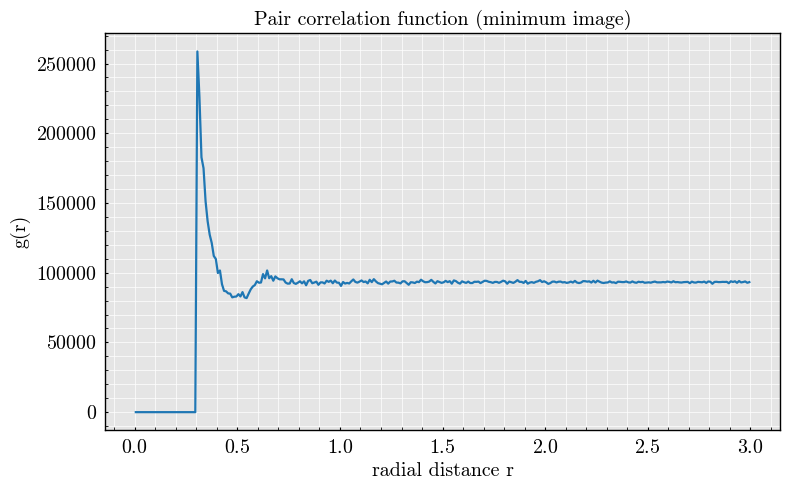

In [12]:
_ = result.plot_pair_correlation(
    pair_correlation_bins=300,
    maximum_number_of_pairs=80_000_000
)
